In [1]:
import astropy.units as u
import numpy as np
from noise_utils import *
import matplotlib.pyplot as plt

#### Part 2 Fractional Pixels

In [2]:
# Given data

pixel_size = 15 * u.micron

dark_current_rate = 3. / u.hour

read_noise = 3   #per pixel

sky_count_rate = 150  /u.s / u.arcsec**2

psf_fwhm = 1.4 * u.arcsec

focal_plane_scale = 16.5 * u.arcsec / u.mm

In [3]:
num_pixels = get_pix_num(focal_plane_scale=focal_plane_scale,psf_fwhm=psf_fwhm, pixel_size=pixel_size)

In [4]:
num_pixels

<Quantity 25.13017692>

### Problem 2

In [5]:
source_count_rate = 10  / u.s 

t_exps = np.arange(1, 60, 1) * u.s

num_pixels = get_pix_num(focal_plane_scale=focal_plane_scale,psf_fwhm=psf_fwhm, pixel_size=pixel_size)

In [6]:
params = {
    'source_count_rate': source_count_rate,
    'sky_count_rate': sky_count_rate,
    'read_noise': read_noise,
    'dark_current_rate': dark_current_rate,
    'num_pixels': num_pixels,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,
}

snr_l, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l, fractional_dark_current_noise_l = noise_simulations(params=params, t_exps=t_exps)

<Axes: title={'center': 'Noise Rates vs Exposure Time'}, xlabel='Exposure Time (s)', ylabel='Fractional Noise Rate Contributions'>

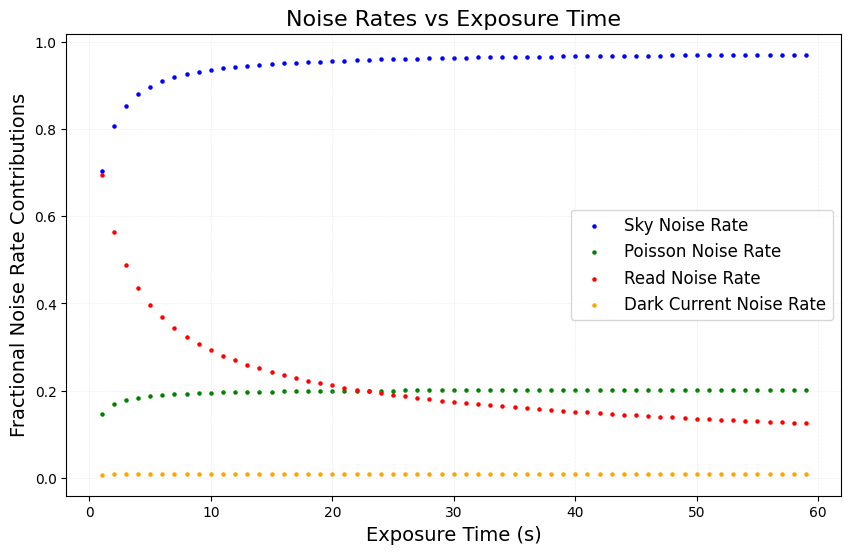

In [7]:
plot_noise_rates_vs_t_exps(t_exps, 
                           fractional_sky_noise_l=fractional_sky_noise_l,
                           fractional_poisson_noise_l=fractional_poisson_noise_l, 
                           fractional_read_noise_l=fractional_read_noise_l,
                            fractional_dark_current_noise_l=fractional_dark_current_noise_l,
                           logy_scale=False)

#### Problem 3

In [8]:
source_count_rate_l = (np.arange(0,600,1)) /u.s
t_exp = 10 * u.s

params = {
    'sky_count_rate': sky_count_rate,
    'read_noise': read_noise,
    'num_pixels': num_pixels,
    'dark_current_rate': dark_current_rate,
    't_exp': t_exp,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,

}

snr_l, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l, fractional_dark_current_noise_l = noise_simulations(
    params=params,
    source_count_rate_l=source_count_rate_l,
    varying_qty='source_rate'
)

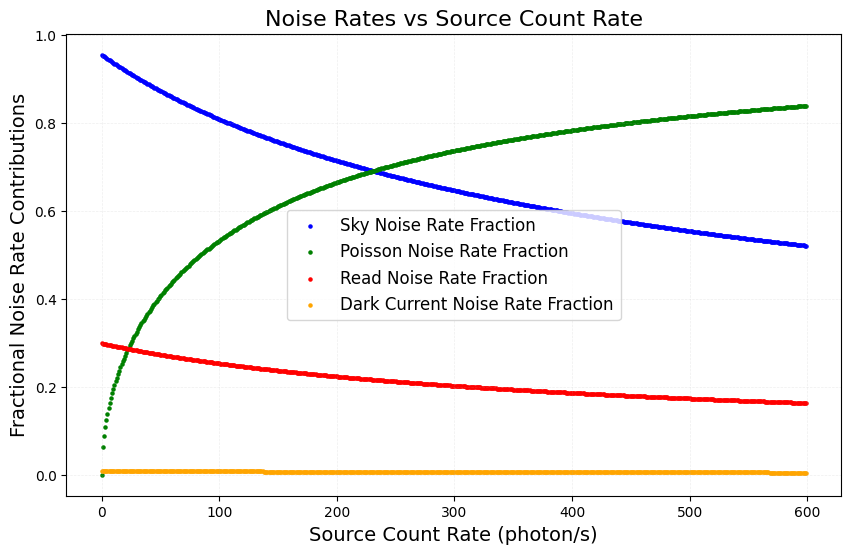

In [9]:
plot_noise_rates_vs_photon_rate(source_count_rate_l,
                                 fractional_sky_noise_l=fractional_sky_noise_l,
                                 fractional_poisson_noise_l=fractional_poisson_noise_l,
                                 fractional_read_noise_l=fractional_read_noise_l,
                                    fractional_dark_current_noise_l=fractional_dark_current_noise_l,
                                 )

### Part 3

#### Problem 4

In [11]:
t_exps = np.arange(10, 250, 1) * u.s

In [12]:
params = {
    'source_count_rate': source_count_rate,
    'sky_count_rate': sky_count_rate,
    'read_noise': read_noise,
    'dark_current_rate': dark_current_rate,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,
}

snr_l, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l, fractional_dark_current_noise_l = noise_simulations(params=params, t_exps=t_exps)

<Axes: title={'center': 'Noise Rates vs Exposure Time'}, xlabel='Exposure Time (s)', ylabel='Fractional Noise Rate Contributions'>

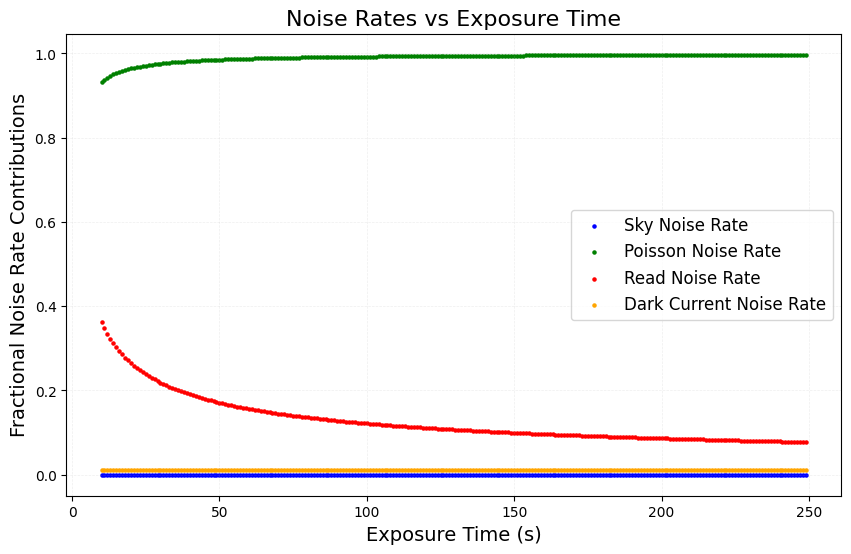

In [13]:
plot_noise_rates_vs_t_exps(t_exps, 
                           fractional_sky_noise_l=fractional_sky_noise_l,
                           fractional_poisson_noise_l=fractional_poisson_noise_l, 
                           fractional_read_noise_l=fractional_read_noise_l,
                            fractional_dark_current_noise_l=fractional_dark_current_noise_l,
                           logy_scale=False)

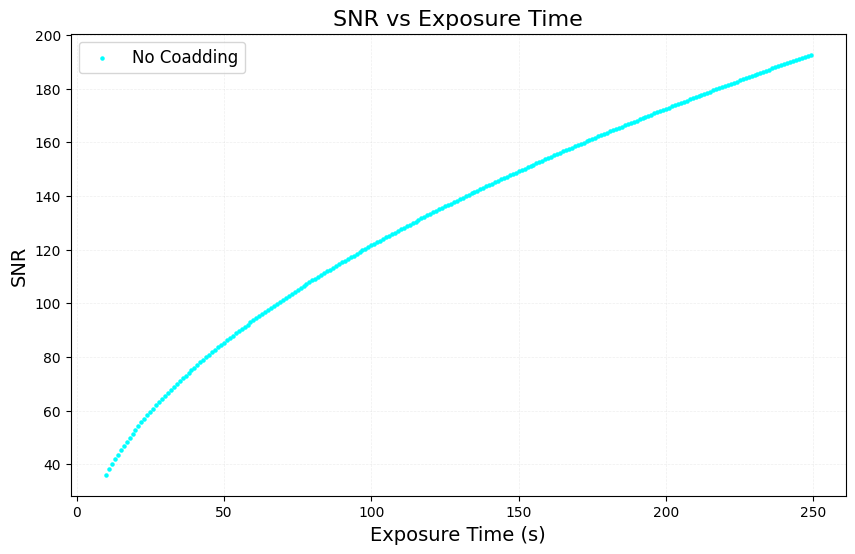

In [14]:
ax0 = plot_snr_vs_t_exps(t_exps, snr_l,lbl='No Coadding')

#### Computing for coadded signal

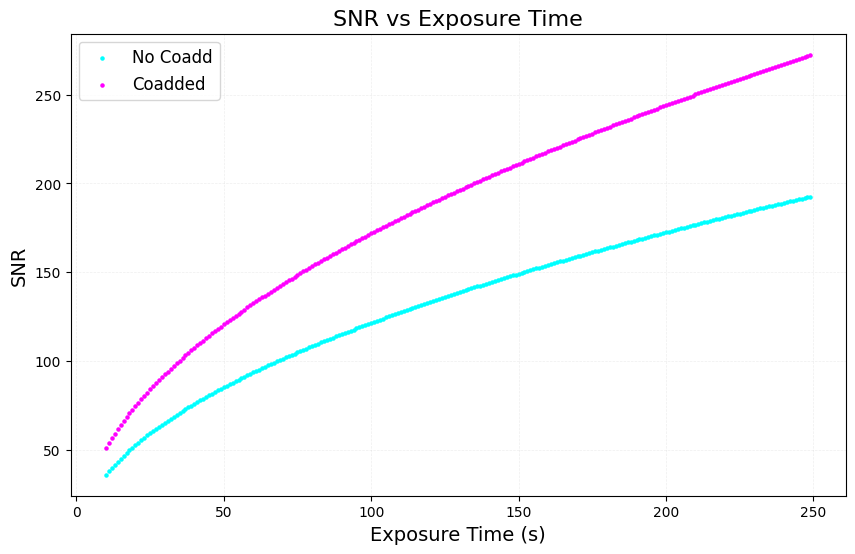

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
snr_l1, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l, fractional_dark_current_noise_l = noise_simulations(params=params, t_exps=t_exps,num_coadds=2)
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=snr_l, ax=ax,lbl='No Coadd')
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=snr_l1, ax=ax, lbl='Coadded',ax_color='magenta')
plt.show()

#### Problem 5
#### Doubling the exposure time

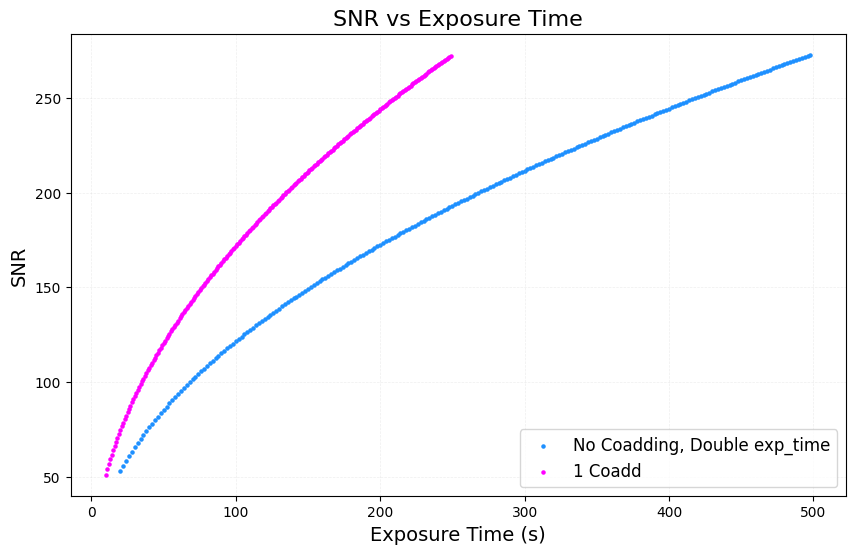

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
snr_l3, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l, fractional_dark_current_noise_l = noise_simulations(params=params, t_exps=2*t_exps,num_coadds=1)
plot_snr_vs_t_exps(t_exps=2*t_exps,snr_l=snr_l3, ax=ax,ax_color='dodgerblue',lbl='No Coadding, Double exp_time')
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=snr_l1, ax=ax, lbl='1 Coadd',ax_color='magenta')
plt.show()

#### Comparing the ratio of SNR for coadded to double exposure time

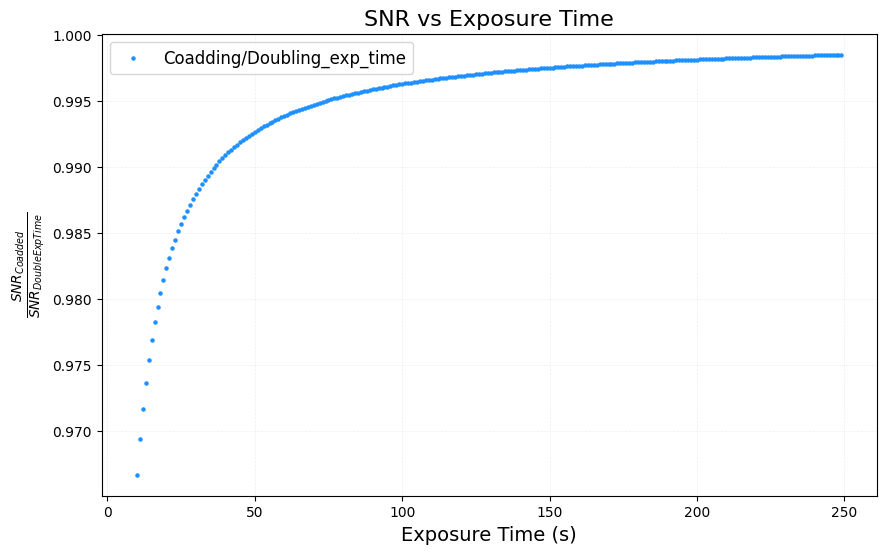

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
new_ax = plot_snr_vs_t_exps(t_exps=t_exps,snr_l=np.array(snr_l1)/np.array(snr_l3), 
                            ax=ax,ax_color='dodgerblue',lbl='Coadding/Doubling_exp_time',
                            set_logyscale=False,ylbl=r'$\frac{SNR_{Coadded}}{SNR_{Double Exp Time}}$')

#### Problem 6
#### Same comparison as above but with sky noise

<Axes: title={'center': 'SNR vs Exposure Time'}, xlabel='Exposure Time (s)', ylabel='$\\frac{SNR_{Coadded}}{SNR_{Double Exp Time}}$'>

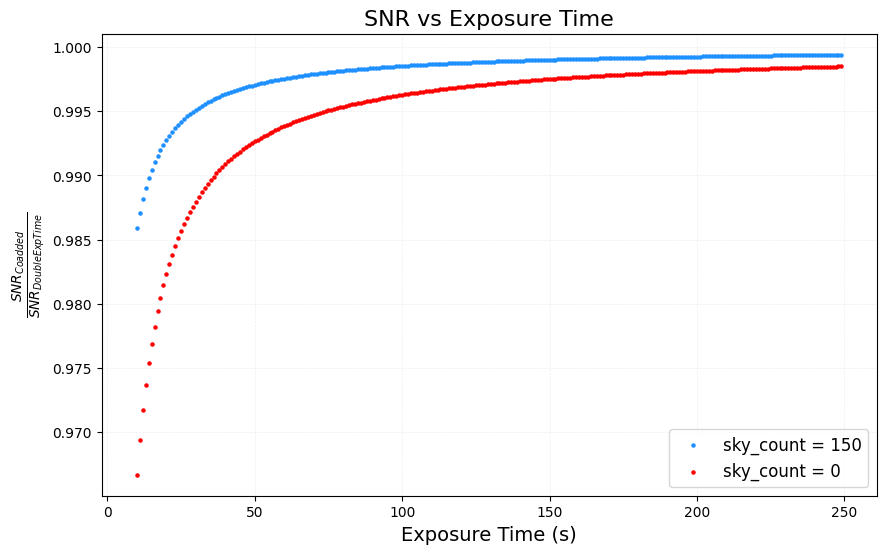

In [20]:
sky_count_rate = 150  /u.s / u.arcsec**2
params = {
    'source_count_rate': source_count_rate,
    'sky_count_rate': sky_count_rate,
    'dark_current_rate': dark_current_rate,
    'read_noise': read_noise,
    'num_pixels': num_pixels,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,
}

snr_l4, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l, fractional_dark_current_noise_l = noise_simulations(params=params, t_exps=t_exps,num_coadds=2)
snr_l5, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l, fractional_dark_current_noise_l = noise_simulations(params=params, t_exps=2*t_exps,num_coadds=1)

fig, ax = plt.subplots(figsize=(10, 6))
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=np.array(snr_l4)/np.array(snr_l5), ax=ax,ax_color='dodgerblue',lbl='sky_count = 150',set_logyscale=False)
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=np.array(snr_l1)/np.array(snr_l3), ax=ax,ax_color='red',lbl='sky_count = 0',set_logyscale=False,ylbl=r'$\frac{SNR_{Coadded}}{SNR_{Double Exp Time}}$')

#### Question 4
##### At low exposure times, sky noise is the dominant noise source, therefore, SNR improves more rapidly with coadding than with doubling the exposure time.

### Part 4

In [23]:
# Given data
t_exp = 600 * u.s

pixel_size = 15 * u.micron

dark_current_rate = 3. / u.hour

read_noise = 3   #per pixel

sky_count_rate = 150  /u.s / u.arcsec**2

source_count_rate = 10  / u.s 

psf_fwhm = 1.4 * u.arcsec

focal_plane_scale = 16.5 * u.arcsec / u.mm
